<a href="https://colab.research.google.com/github/malmusfer/Animated-plots/blob/master/covid19_timeseries_animated_figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![matplotlib](https://upload.wikimedia.org/wikipedia/en/thumb/5/56/Matplotlib_logo.svg/300px-Matplotlib_logo.svg.png)

# Mini-Project: Communicate Data Findings: Covide19 times series Data
## Animated plots
## by: Almutairi, Muhanned
![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/LinkedIn_Logo_2013.svg/200px-LinkedIn_Logo_2013.svg.png) [LinkedIn profile](https://www.linkedin.com/in/muhanned-almutairi-5bb1a5a0/)

This is a mini project that I will illustrate the use of animation function in Matplotlib to communicate your finding. In this project, we will use the data of COVID 19 for the purpose of the demonstration. 

## Table of Contents
- [Introduction](#intro)
- [Gathering data](#Gathering)
- [Data wrangling](#wrangling)
- [Animation Code](#Ani)

<a id='intro'></a>
## Introduction
[Matplotlib](https://en.wikipedia.org/wiki/Matplotlib) is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+.

The `matplotlib.animation` package is one of the package in Matplotlib library. The `matplotlib.animation` package offer some classes for creating animations. `FuncAnimation` creates animations by repeatedly calling a function. Here we use a function `animate()` that changes the coordinates of a point on the graph of a sine function.

First, we would gather the data from URL and we will do some wrangling to make it useful and practical to plot. then we would write a couple of codes for the animated plots. The animation would be plotted in three kinds of plots such as line-plot, pie-plot, and bar-plots.

<a id='Gathering'></a>
## Gathering data

In [ ]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as Animation
from matplotlib.animation import FFMpegWriter
from matplotlib.animation import PillowWriter

%matplotlib notebook


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Navigate to the dataset URL
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [ ]:
#read the dataset and store it in df
df = pd.read_csv(url, delimiter=',', header='infer')

In [ ]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,115,120,122,127,132,136,153,168,169,173,178,187,193,205,216,218,219,220,227,235,246,249,257,265,270,294,300,309,327,357,369,384,405,426,446,451,471,478,491,504
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,32,32,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,35,36,36,36,36,37,38
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,494,502,507,515,522,529,536,542,548,555,561,568,575,582,592,600,609,617,623,630,638,646,653,661,667,673,681,690,698,707,715,724,732,741,751,760,767,777,788,799
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,48,48,48,48,49,49,49,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,52,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,6,6,6,6,7


<a id='wrangling'></a>
## Data wrangling

In [ ]:
# Slice the dataset based on the group of interest in our case it is the following countries 'Saudi Arabia', 'US', 'Italy', 'Germany'
df_interest = df.loc[df['Country/Region'].isin(['Saudi Arabia', 'US', 'Italy', 'Germany']) & df['Province/State'].isna()]

In [ ]:
df_interest

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20
120,NaN,Germany,51.0000,9.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7549,7569,7661,7738,7861,7884,7897,7938,7962,8003,8081,8144,8203,8228,8261,8283,8309,8372,8428,8470,8504,8530,8540,8555,8563,8602,8635,8658,8673,8685,8695,8736,8752,8772,8783,8793,8801,8807,8820,8851
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,7,10,12,...,30395,30560,30739,30911,31106,31368,31610,31763,31908,32007,32169,32330,32486,32616,32735,32785,32877,32955,33072,33142,33229,33340,33415,33475,33530,33601,33689,33774,33846,33899,33964,34043,34114,34167,34223,34301,34345,34371,34405,34448
192,NaN,Saudi Arabia,24.0000,45.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,239,246,255,264,273,283,292,302,312,320,329,339,351,364,379,390,399,411,425,441,458,480,503,525,549,579,611,642,676,712,746,783,819,857,893,932,972,1011,1052,1091
225,NaN,US,37.0902,-95.7129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,79122,79856,81018,82709,84452,86229,87862,89084,89893,90683,92252,93775,95020,96296,97406,98039,98541,99239,100744,101937,103113,104054,104659,105430,106461,107444,108479,109449,110124,110575,111068,112014,112935,113823,114669,115436,115732,116127,116963,117717


In [ ]:
df_interest.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/8/20', '6/9/20', '6/10/20', '6/11/20', '6/12/20', '6/13/20',
       '6/14/20', '6/15/20', '6/16/20', '6/17/20'],
      dtype='object', length=152)

In [ ]:
# drop 'Province/State', 'Lat', 'Long' coloumns since it would not affect our visualization
df_interest = df_interest.drop(['Province/State', 'Lat', 'Long'], axis=1)

In [ ]:
df_interest

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20
120,Germany,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7549,7569,7661,7738,7861,7884,7897,7938,7962,8003,8081,8144,8203,8228,8261,8283,8309,8372,8428,8470,8504,8530,8540,8555,8563,8602,8635,8658,8673,8685,8695,8736,8752,8772,8783,8793,8801,8807,8820,8851
137,Italy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,7,10,12,17,21,29,...,30395,30560,30739,30911,31106,31368,31610,31763,31908,32007,32169,32330,32486,32616,32735,32785,32877,32955,33072,33142,33229,33340,33415,33475,33530,33601,33689,33774,33846,33899,33964,34043,34114,34167,34223,34301,34345,34371,34405,34448
192,Saudi Arabia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,239,246,255,264,273,283,292,302,312,320,329,339,351,364,379,390,399,411,425,441,458,480,503,525,549,579,611,642,676,712,746,783,819,857,893,932,972,1011,1052,1091
225,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,79122,79856,81018,82709,84452,86229,87862,89084,89893,90683,92252,93775,95020,96296,97406,98039,98541,99239,100744,101937,103113,104054,104659,105430,106461,107444,108479,109449,110124,110575,111068,112014,112935,113823,114669,115436,115732,116127,116963,117717


In [ ]:
#Flip the dataset to we can use x-line that would be the time-series
df_interest = df_interest.transpose()

In [ ]:
df_interest

,120,137,192,225
Country/Region,Germany,Italy,Saudi Arabia,US
1/22/20,0,0,0,0
1/23/20,0,0,0,0
1/24/20,0,0,0,0
1/25/20,0,0,0,0
...,...,...,...,...
6/13/20,8793,34301,932,115436
6/14/20,8801,34345,972,115732
6/15/20,8807,34371,1011,116127
6/16/20,8820,34405,1052,116963


In [ ]:
#Set the index
df_interest.columns = df_interest.iloc[0]

In [ ]:
#Drop and create new data to the nex index
df1= df_interest.drop(df_interest.index[0])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 1/22/20 to 6/17/20
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Germany       148 non-null    object
 1   Italy         148 non-null    object
 2   Saudi Arabia  148 non-null    object
 3   US            148 non-null    object
dtypes: object(4)
memory usage: 5.8+ KB


In [ ]:
#fix the index to Date type
df1.index = pd.to_datetime(df1.index)
#fix the data type to int
df1 = df1.astype({"Germany": int,"Italy": int, "Saudi Arabia": int, "US": int })

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 148 entries, 2020-01-22 to 2020-06-17
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Germany       148 non-null    int64
 1   Italy         148 non-null    int64
 2   Saudi Arabia  148 non-null    int64
 3   US            148 non-null    int64
dtypes: int64(4)
memory usage: 5.8 KB


In [ ]:
df1.tail()

Country/Region,Germany,Italy,Saudi Arabia,US
2020-06-13,8793,34301,932,115436
2020-06-14,8801,34345,972,115732
2020-06-15,8807,34371,1011,116127
2020-06-16,8820,34405,1052,116963
2020-06-17,8851,34448,1091,117717


<a id='Ani'></a>
## Animation Code

### The Animated Line Plot

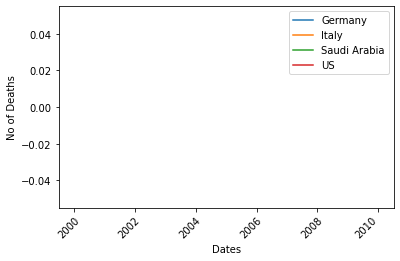

In [ ]:
# initializing a figure in  
# which the graph will be plotted 
fig = plt.figure()

#rotate the x-axis values
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
#ensuring the dates (on the x-axis) fit in the screen
plt.subplots_adjust(bottom = 0.2, top = 0.9)
plt.ylabel('No of Deaths')
plt.xlabel('Dates')

#Define animation function
def Animate(i):
  #note it only returns the dataset, up to the point i
  p = plt.plot(df1[:i].index, df1[:i].values)
  plt.legend(df1.columns)

# calling the animation function 
animator1 = Animation.FuncAnimation(fig, Animate, frames=200)
plt.show()

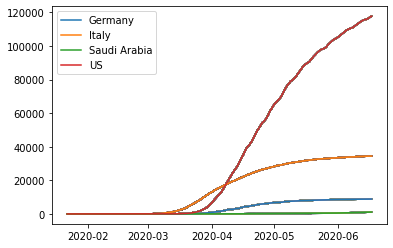

In [ ]:
# Save the animation as gif
animator1.save(r"test1.gif", writer=PillowWriter(fps=10))

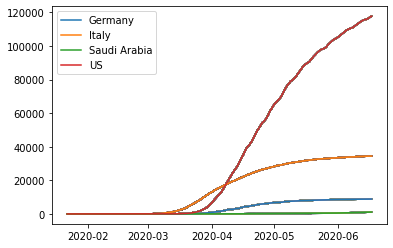

In [ ]:
# Save the animation as mp4
animator1.save("test1.mp4", writer=FFMpegWriter(fps=5))

### The Animated Pie Chart

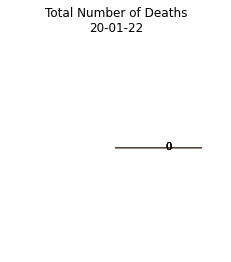

In [ ]:
# initializing a figure in  
# which the graph will be plotted 
fig,ax = plt.subplots()
#pop out each slice from the pie
explode=[0.01,0.01,0.01, 0.01] 

#Define animation function
def getmepie(i):
  #turn % back to a number
  def absolute_value(val): 
    a  = np.round(val/100.*df1.head(i).max().sum(), 0)
    return int(a)
  ax.clear()
  plot = df1.head(i).max().plot.pie(y=df1.columns,autopct=absolute_value, label='',explode = explode, shadow = True)
  plot.set_title('Total Number of Deaths\n' + str(df1.index[min( i, len(df1.index)-1 )].strftime('%y-%m-%d')), fontsize=12)

# calling the animation function 
animator2 = Animation.FuncAnimation(fig, getmepie, frames=200, interval=3000)
plt.show()

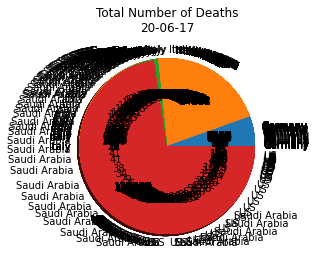

In [ ]:
# Save the animation as gif
animator2.save(r"test2.gif", writer=PillowWriter(fps=10))

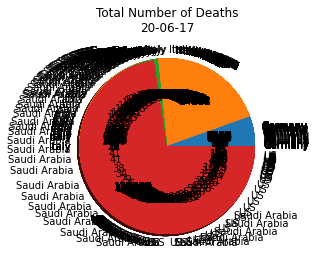

In [ ]:
# Save the animation as mp4
animator2.save("test2.mp4", writer=FFMpegWriter(fps=10))

### The Animated Vertical Bar Chart

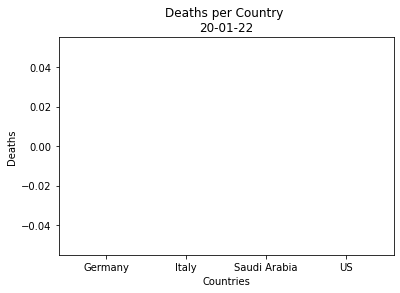

In [ ]:
# initializing a figure in  
# which the graph will be plotted 
fig = plt.figure()
plt.ylabel('Deaths')
plt.xlabel('Countries')

#Define animation function
def buildmebarchart(i=int):
  #the loop iterates an extra one time, which causes the dataframes to go out of bounds. This was the easiest (most lazy) way to solve this :)
  iv = min(i, len(df1.index)-1) 
  objects = df1.max().index
  y_pos = np.arange(len(objects))
  performance = df1.iloc[[iv]].values.tolist()[0]
  plt.bar(y_pos, performance, align='center')
  plt.xticks(y_pos, objects)
  plt.title('Deaths per Country \n' + str(df1.index[iv].strftime('%y-%m-%d')))

# calling the animation function 
animator3 = Animation.FuncAnimation(fig, buildmebarchart, frames=200, interval=20)
plt.show()

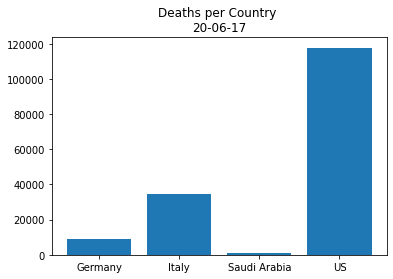

In [ ]:
# Save the animation as gif
animator3.save(r"test3.gif", writer=PillowWriter(fps=10))

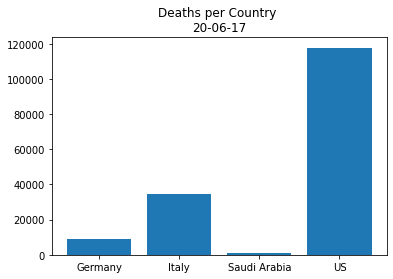

In [ ]:
# Save the animation as mp4
animator3.save("test3.mp4", writer=FFMpegWriter(fps=10))

### The Animated Horizontal Bar Chart

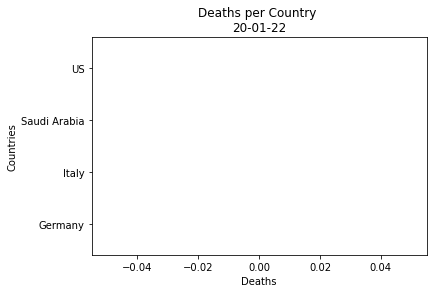

In [ ]:
# initializing a figure in  
# which the graph will be plotted 
fig = plt.figure()
plt.xlabel('Deaths')
plt.ylabel('Countries')

#Define animation function
def buildmebarchart(i=int):
  #the loop iterates an extra one time, which causes the dataframes to go out of bounds. This was the easiest (most lazy) way to solve this :)
  iv = min(i, len(df1.index)-1) 
  objects = df1.max().index
  y_pos = np.arange(len(objects))
  performance = df1.iloc[[iv]].values.tolist()[0]
  plt.title('Deaths per Country \n' + str(df1.index[iv].strftime('%y-%m-%d')))
  plt.barh(y_pos, performance, align='center')
  plt.yticks(y_pos, objects)
  

# calling the animation function 
animator4 = Animation.FuncAnimation(fig, buildmebarchart, frames=200, interval=20)
plt.show()

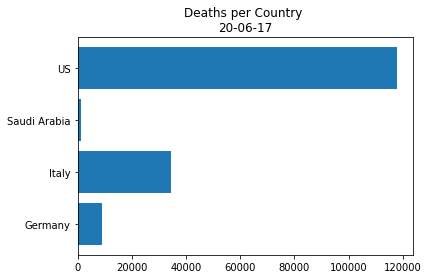

In [ ]:
# Save the animation as gif
animator4.save(r"test4.gif", writer=PillowWriter(fps=10))

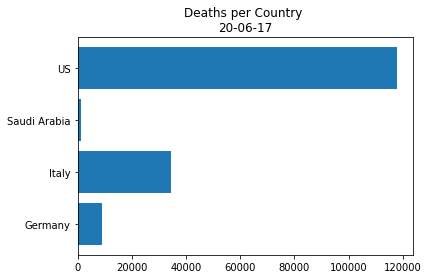

In [ ]:
# Save the animation as mp4
animator4.save("test4.mp4", writer=FFMpegWriter(fps=10))

# Resoures 
*   [post](https://towardsdatascience.com/learn-how-to-create-animated-graphs-in-python-fce780421afe)
*   [Matplotlib](https://en.wikipedia.org/wiki/Matplotlib) 
*   [Animation documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.animation.FuncAnimation.html#matplotlib.animation.FuncAnimation)



